In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import layers, losses, optimizers
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
text_data=open('seeds_dataset.txt').read()
text_data=text_data.split('\n')

df=pd.DataFrame(list(map(lambda x:x.split('\t'), text_data)))
df.drop(columns=[8,9],inplace=True)
df.shape

(210, 8)

In [3]:
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.871,5.763,3.312,2.221,5.22,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [4]:
df[7].value_counts()

2    70
3    70
1    70
Name: 7, dtype: int64

In [5]:
target=pd.get_dummies(df[7])

df.drop(columns=7,inplace=True)

scaler=StandardScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [6]:
X, X_test, y, y_test = train_test_split(df,target,test_size=0.1)

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.2)

X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((151, 7), (38, 7), (21, 7), (151, 3), (38, 3), (21, 3))

In [7]:
hidden_dim = 32
output_dim = 3

class MLP(Model):
    def __init__(self, hidden_dim, output_dim):
        
        #initializing methods of parent class (Model) that we are inheriting from 
        super(MLP, self).__init__()
        
        self.hidden_dim = hidden_dim
        self.output_dim = output_dim
        
        self.fc1 = tf.keras.Sequential([layers.Dense(hidden_dim, activation='sigmoid')])
        self.fc2 = tf.keras.Sequential([layers.Dense(output_dim, activation='softmax')])
    
    def call(self,x):
        hidden = self.fc1(x)
        output = self.fc2(x)
        
        return output
    
model = MLP(hidden_dim, output_dim)

In [8]:
lrop = ReduceLROnPlateau(factor=0.8, patience=3)
estop = EarlyStopping(patience=10)

optimizer = optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=optimizer, loss=losses.CategoricalCrossentropy(), metrics = 'accuracy')

In [9]:
history = model.fit(X_train, y_train, epochs = 200, shuffle = True, batch_size = 32,
                    validation_data = (X_val, y_val), callbacks = [lrop, estop])

Epoch 1/200
5/5 [==============================] - 2s 261ms/step - loss: 1.3159 - accuracy: 0.2446 - val_loss: 1.0911 - val_accuracy: 0.3158
Epoch 2/200
5/5 [==============================] - 0s 14ms/step - loss: 1.1520 - accuracy: 0.2505 - val_loss: 0.8643 - val_accuracy: 0.5789
Epoch 3/200
5/5 [==============================] - 0s 13ms/step - loss: 0.8978 - accuracy: 0.5143 - val_loss: 0.6996 - val_accuracy: 0.8158
Epoch 4/200
5/5 [==============================] - 0s 13ms/step - loss: 0.7676 - accuracy: 0.6643 - val_loss: 0.5864 - val_accuracy: 0.8684
Epoch 5/200
5/5 [==============================] - 0s 16ms/step - loss: 0.6974 - accuracy: 0.6928 - val_loss: 0.5099 - val_accuracy: 0.8684
Epoch 6/200
5/5 [==============================] - 0s 13ms/step - loss: 0.5744 - accuracy: 0.7913 - val_loss: 0.4571 - val_accuracy: 0.8684
Epoch 7/200
5/5 [==============================] - 0s 15ms/step - loss: 0.5246 - accuracy: 0.7988 - val_loss: 0.4194 - val_accuracy: 0.9211
Epoch 8/200
5/5 [==

5/5 [==============================] - 0s 14ms/step - loss: 0.2246 - accuracy: 0.9049 - val_loss: 0.1938 - val_accuracy: 0.8947
Epoch 58/200
5/5 [==============================] - 0s 12ms/step - loss: 0.2286 - accuracy: 0.9010 - val_loss: 0.1920 - val_accuracy: 0.8947
Epoch 59/200
5/5 [==============================] - 0s 15ms/step - loss: 0.2233 - accuracy: 0.8888 - val_loss: 0.1906 - val_accuracy: 0.8947
Epoch 60/200
5/5 [==============================] - 0s 12ms/step - loss: 0.1731 - accuracy: 0.9309 - val_loss: 0.1899 - val_accuracy: 0.8947
Epoch 61/200
5/5 [==============================] - 0s 13ms/step - loss: 0.2141 - accuracy: 0.9122 - val_loss: 0.1887 - val_accuracy: 0.8947
Epoch 62/200
5/5 [==============================] - 0s 12ms/step - loss: 0.1823 - accuracy: 0.9218 - val_loss: 0.1884 - val_accuracy: 0.8947
Epoch 63/200
5/5 [==============================] - 0s 12ms/step - loss: 0.2265 - accuracy: 0.8983 - val_loss: 0.1889 - val_accuracy: 0.8947
Epoch 64/200
5/5 [========

5/5 [==============================] - 0s 17ms/step - loss: 0.1724 - accuracy: 0.9166 - val_loss: 0.1538 - val_accuracy: 0.9211
Epoch 116/200
5/5 [==============================] - 0s 16ms/step - loss: 0.1692 - accuracy: 0.9196 - val_loss: 0.1539 - val_accuracy: 0.9211
Epoch 117/200
5/5 [==============================] - 0s 13ms/step - loss: 0.1486 - accuracy: 0.9244 - val_loss: 0.1539 - val_accuracy: 0.9211
Epoch 118/200
5/5 [==============================] - 0s 13ms/step - loss: 0.1629 - accuracy: 0.9105 - val_loss: 0.1541 - val_accuracy: 0.9211
Epoch 119/200
5/5 [==============================] - 0s 16ms/step - loss: 0.1514 - accuracy: 0.9326 - val_loss: 0.1539 - val_accuracy: 0.9211
Epoch 120/200
5/5 [==============================] - 0s 16ms/step - loss: 0.1741 - accuracy: 0.9075 - val_loss: 0.1539 - val_accuracy: 0.9211
Epoch 121/200
5/5 [==============================] - 0s 17ms/step - loss: 0.1462 - accuracy: 0.9287 - val_loss: 0.1532 - val_accuracy: 0.9211
Epoch 122/200
5/5 [=

Epoch 173/200
5/5 [==============================] - 0s 13ms/step - loss: 0.1313 - accuracy: 0.9344 - val_loss: 0.1459 - val_accuracy: 0.9211
Epoch 174/200
5/5 [==============================] - 0s 13ms/step - loss: 0.1755 - accuracy: 0.9114 - val_loss: 0.1458 - val_accuracy: 0.9211
Epoch 175/200
5/5 [==============================] - 0s 12ms/step - loss: 0.1816 - accuracy: 0.9149 - val_loss: 0.1459 - val_accuracy: 0.9211
Epoch 176/200
5/5 [==============================] - 0s 13ms/step - loss: 0.1345 - accuracy: 0.9335 - val_loss: 0.1458 - val_accuracy: 0.9211
Epoch 177/200
5/5 [==============================] - 0s 15ms/step - loss: 0.1883 - accuracy: 0.9023 - val_loss: 0.1456 - val_accuracy: 0.9211
Epoch 178/200
5/5 [==============================] - 0s 14ms/step - loss: 0.1889 - accuracy: 0.8940 - val_loss: 0.1455 - val_accuracy: 0.9211
Epoch 179/200
5/5 [==============================] - 0s 13ms/step - loss: 0.1378 - accuracy: 0.9266 - val_loss: 0.1453 - val_accuracy: 0.9211
Epoch 

Final Training Accuracy:  0.9205297827720642
Final Validation Accuracy:  0.9210526347160339


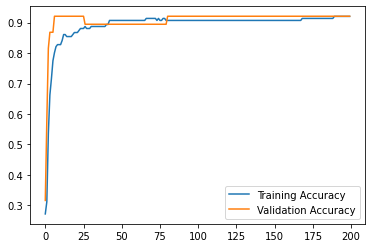

In [10]:
training_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print('Final Training Accuracy: ', history.history['accuracy'][-1])
print('Final Validation Accuracy: ', history.history['val_accuracy'][-1])

plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.legend()
plt.show()

In [11]:
pred_labels = np.argmax(model.call(X_test.values).numpy(), axis=1)
actual_labels = np.argmax(y_test.values, axis=1)

print('Testing Accuracy:', accuracy_score(actual_labels, pred_labels).round(3))

Testing Accuracy: 0.952
